# Introduction

Google Trends gives us an estimate of search volume. Let's explore if search popularity relates to other kinds of data. Perhaps there are patterns in Google's search volume and the price of Bitcoin or a hot stock like Tesla. Perhaps search volume for the term "Unemployment Benefits" can tell us something about the actual unemployment rate? 

Data Sources: <br>
<ul>
<li> <a href="https://fred.stlouisfed.org/series/UNRATE/">Unemployment Rate from FRED</a></li>
<li> <a href="https://trends.google.com/trends/explore">Google Trends</a> </li>  
<li> <a href="https://finance.yahoo.com/quote/TSLA/history?p=TSLA">Yahoo Finance for Tesla Stock Price</a> </li>    
<li> <a href="https://finance.yahoo.com/quote/BTC-USD/history?p=BTC-USD">Yahoo Finance for Bitcoin Stock Price</a> </li>
</ul>

# Import Statements

In [124]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Read the Data

Download and add the .csv files to the same folder as your notebook.

In [125]:
df_tesla = pd.read_csv('TESLA Search Trend vs Price.csv')

df_btc_search = pd.read_csv('Bitcoin Search Trend.csv')
df_btc_price = pd.read_csv('Daily Bitcoin Price.csv')

df_unemployment = pd.read_csv('UE Benefits Search vs UE Rate 2004-19.csv')

# Data Exploration

### Tesla

**Challenge**: <br>
<ul>
<li>What are the shapes of the dataframes? </li>
<li>How many rows and columns? </li>
<li>What are the column names? </li>
<li>Complete the f-string to show the largest/smallest number in the search data column</li> 
<li>Try the <code>.describe()</code> function to see some useful descriptive statistics</li>
<li>What is the periodicity of the time series data (daily, weekly, monthly)? </li>
<li>What does a value of 100 in the Google Trend search popularity actually mean?</li>
</ul>

In [126]:
# Tesla data frame has 124 rows and 3 columns
df_tesla.shape

(124, 3)

In [127]:
# Column names are below
df_tesla.head()

,MONTH,TSLA_WEB_SEARCH,TSLA_USD_CLOSE
0,2010-06-01,3,4.766
1,2010-07-01,3,3.988
2,2010-08-01,2,3.896
3,2010-09-01,2,4.082
4,2010-10-01,2,4.368


In [128]:
print(f'Largest value for Tesla in Web Search: {df_tesla.TSLA_WEB_SEARCH.max()}')
print(f'Smallest value for Tesla in Web Search: {df_tesla.TSLA_WEB_SEARCH.min()}')

Largest value for Tesla in Web Search: 31
Smallest value for Tesla in Web Search: 2


In [129]:
df_tesla.describe()

,TSLA_WEB_SEARCH,TSLA_USD_CLOSE
count,124.000000,124.000000
mean,8.725806,50.962145
std,5.870332,65.908389
min,2.000000,3.896000
25%,3.750000,7.352500
50%,8.000000,44.653000
75%,12.000000,58.991999
max,31.000000,498.320007


### Unemployment Data

In [130]:
df_unemployment.shape

(181, 3)

In [131]:
df_unemployment.head()

,MONTH,UE_BENEFITS_WEB_SEARCH,UNRATE
0,2004-01,34,5.7
1,2004-02,33,5.6
2,2004-03,25,5.8
3,2004-04,29,5.6
4,2004-05,23,5.6


In [132]:
print('Largest value for "Unemployemnt Benefits" '
      f'in Web Search: {df_unemployment.UE_BENEFITS_WEB_SEARCH.max()} ')

Largest value for "Unemployemnt Benefits" in Web Search: 100 


### Bitcoin

In [133]:
df_btc_price.shape

(2204, 3)

In [134]:
df_btc_price.head()

,DATE,CLOSE,VOLUME
0,2014-09-17,457.334015,21056800.0
1,2014-09-18,424.440002,34483200.0
2,2014-09-19,394.795990,37919700.0
3,2014-09-20,408.903992,36863600.0
4,2014-09-21,398.821014,26580100.0


In [135]:
df_btc_search.shape

(73, 2)

In [136]:
df_btc_search.head()

,MONTH,BTC_NEWS_SEARCH
0,2014-09,5
1,2014-10,4
2,2014-11,4
3,2014-12,4
4,2015-01,5


In [137]:
print(f'largest BTC News Search:{df_btc_search.BTC_NEWS_SEARCH.max()} ')

largest BTC News Search:100 


# Data Cleaning

### Check for Missing Values

**Challenge**: Are there any missing values in any of the dataframes? If so, which row/rows have missing values? How many missing values are there?

In [138]:
# Using .isna() method to check if there's any missing values
print(f'Missing values for Tesla?:{df_tesla.isna().values.any()}')
print(f'Missing values for U/E?: {df_unemployment.isna().values.any()}')
print(f'Missing values for BTC Search?: {df_btc_search.isna().values.any()}')

Missing values for Tesla?:False
Missing values for U/E?: False
Missing values for BTC Search?: False


In [139]:
print(f'Missing values for BTC price?:{df_btc_price.isna().values.any()} ')
df_btc_price.head()

Missing values for BTC price?:True 


,DATE,CLOSE,VOLUME
0,2014-09-17,457.334015,21056800.0
1,2014-09-18,424.440002,34483200.0
2,2014-09-19,394.795990,37919700.0
3,2014-09-20,408.903992,36863600.0
4,2014-09-21,398.821014,26580100.0


In [140]:
# Using .sum () to find the total number of missing values, occurences of True
print(f'Number of missing values: {df_btc_price.isna().values.sum()}')

# Finding row where missing values occur
df_btc_price[df_btc_price.CLOSE.isna()]

Number of missing values: 2


,DATE,CLOSE,VOLUME
2148,2020-08-04,NaN,NaN


**Challenge**: Remove any missing values that you found. 

In [141]:
# Removing values in place
df_btc_price.dropna(inplace=True)

### Convert Strings to DateTime Objects

**Challenge**: Check the data type of the entries in the DataFrame MONTH or DATE columns. Convert any strings in to Datetime objects. Do this for all 4 DataFrames. Double check if your type conversion was successful.

In [142]:
# Checking data type
type(df_tesla.MONTH[0])

str

In [143]:
type(df_unemployment.MONTH[0])

str

In [144]:
type(df_btc_price.DATE[0])

str

In [145]:
type(df_btc_search.MONTH[0])

str

In [146]:
# Converting strings to date time objects
df_tesla.MONTH = pd.to_datetime(df_tesla.MONTH)
df_unemployment.MONTH = pd.to_datetime(df_unemployment.MONTH)
df_btc_price.DATE = pd.to_datetime(df_btc_price.DATE)
df_btc_search.MONTH = pd.to_datetime(df_btc_search.MONTH)

In [147]:
# Checking if conversion was successful
df_tesla.MONTH.head()

0   2010-06-01
1   2010-07-01
2   2010-08-01
3   2010-09-01
4   2010-10-01
Name: MONTH, dtype: datetime64[ns]

### Converting from Daily to Monthly Data

[Pandas .resample() documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.resample.html) <br>

In [148]:
# Converting Bitcoin Search Popularity into monthly data using .resample()
# We are getting the last available price of the month
df_btc_monthly = df_btc_price.resample('M', on='DATE').last()
print(df_btc_monthly)

                 DATE         CLOSE        VOLUME
DATE                                             
2014-09-30 2014-09-30    386.944000  3.470730e+07
2014-10-31 2014-10-31    338.321014  1.254540e+07
2014-11-30 2014-11-30    378.046997  9.194440e+06
2014-12-31 2014-12-31    320.192993  1.394290e+07
2015-01-31 2015-01-31    217.464005  2.334820e+07
...               ...           ...           ...
2020-05-31 2020-05-31   9461.058594  2.777329e+10
2020-06-30 2020-06-30   9137.993164  1.573580e+10
2020-07-31 2020-07-31  11323.466797  2.316047e+10
2020-08-31 2020-08-31  11680.820313  2.228593e+10
2020-09-30 2020-09-28  10912.536133  2.122653e+10

[73 rows x 3 columns]


In [149]:
# Average prince over the course of the month
df_btc_monthly = df_btc_price.resample('M', on='DATE').mean()
print(df_btc_monthly)

                   CLOSE        VOLUME
DATE                                  
2014-09-30    407.182428  2.934864e+07
2014-10-31    364.148873  2.912885e+07
2014-11-30    366.099799  2.199111e+07
2014-12-31    341.267871  1.784201e+07
2015-01-31    248.782547  3.544555e+07
...                  ...           ...
2020-05-31   9263.151745  4.149575e+10
2020-06-30   9489.227214  2.169711e+10
2020-07-31   9589.899729  1.760688e+10
2020-08-31  11667.277572  2.290423e+10
2020-09-30  10655.702218  3.039781e+10

[73 rows x 2 columns]


# Data Visualisation

### Notebook Formatting & Style Helpers

In [150]:
# Create locators for ticks on the time axis

In [151]:
# Register date converters to avoid warning messages

### Tesla Stock Price v.s. Search Volume

**Challenge:** Plot the Tesla stock price against the Tesla search volume using a line chart and two different axes. Label one axis 'TSLA Stock Price' and the other 'Search Trend'. 

In [152]:
df_tesla.head()

,MONTH,TSLA_WEB_SEARCH,TSLA_USD_CLOSE
0,2010-06-01,3,4.766
1,2010-07-01,3,3.988
2,2010-08-01,2,3.896
3,2010-09-01,2,4.082
4,2010-10-01,2,4.368


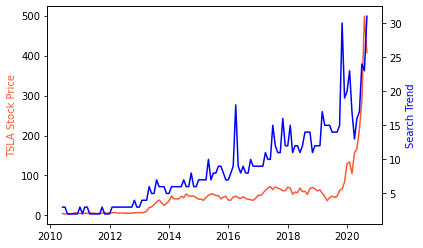

In [153]:
# Get current axis
ax1 = plt.gca()
# Make copy of axis
ax2 = ax1.twinx()

# Configuring both axes
ax1.set_ylabel('TSLA Stock Price', color='#FF5733')
ax2.set_ylabel('Search Trend', color='blue')

# Ploting Tesla stock price against the Tesla search volume
ax1.plot(df_tesla.MONTH, df_tesla.TSLA_USD_CLOSE, color='#FF5733')
ax2.plot(df_tesla.MONTH, df_tesla.TSLA_WEB_SEARCH, color='blue')

**Challenge**: Add colours to style the chart. This will help differentiate the two lines and the axis labels. Try using one of the blue [colour names](https://matplotlib.org/3.1.1/gallery/color/named_colors.html) for the search volume and a HEX code for a red colour for the stock price. 
<br>
<br>
Hint: you can colour both the [axis labels](https://matplotlib.org/3.3.2/api/text_api.html#matplotlib.text.Text) and the [lines](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.lines.Line2D.html#matplotlib.lines.Line2D) on the chart using keyword arguments (kwargs).  

In [154]:
# Added the colors above

**Challenge**: Make the chart larger and easier to read. 
1. Increase the figure size (e.g., to 14 by 8). 
2. Increase the font sizes for the labels and the ticks on the x-axis to 14. 
3. Rotate the text on the x-axis by 45 degrees. 
4. Make the lines on the chart thicker. 
5. Add a title that reads 'Tesla Web Search vs Price'
6. Keep the chart looking sharp by changing the dots-per-inch or [DPI value](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.figure.html). 
7. Set minimum and maximum values for the y and x axis. Hint: check out methods like [set_xlim()](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.axes.Axes.set_xlim.html). 
8. Finally use [plt.show()](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.show.html) to display the chart below the cell instead of relying on the automatic notebook output.

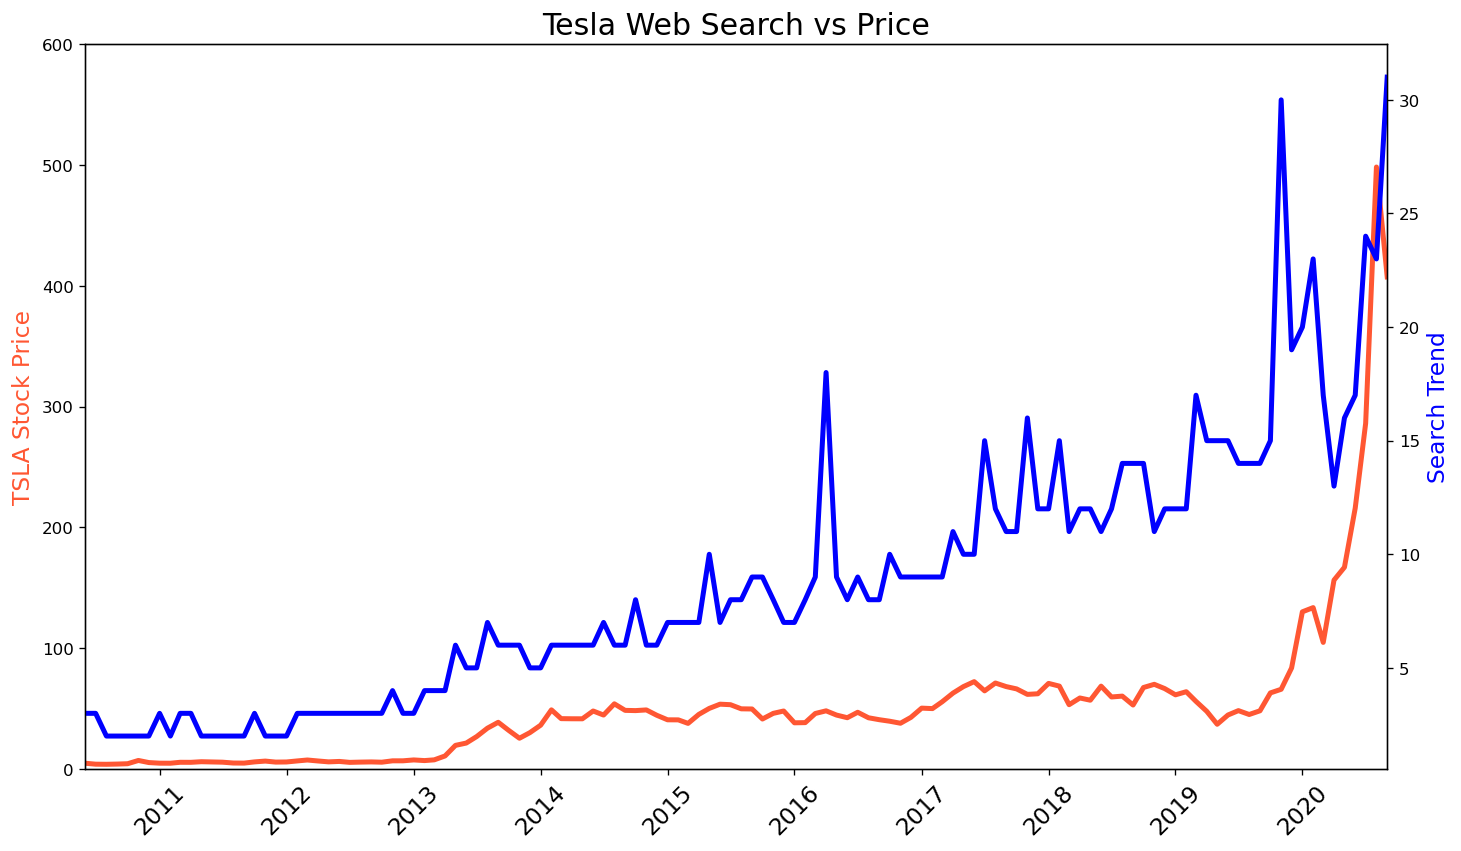

In [155]:
# increase size and resolution
plt.figure(figsize=(14,8), dpi=120) 
# Add title
plt.title('Tesla Web Search vs Price', fontsize=18)

# Increase the size and rotate the labels on the x-axis
plt.xticks(fontsize=14, rotation=45)

# Get current axis
ax1 = plt.gca()
# Make copy of axis
ax2 = ax1.twinx()

# Increase Font Size
ax1.set_ylabel('TSLA Stock Price', color='#FF5733', fontsize=14)
ax2.set_ylabel('Search Trend', color='blue', fontsize=14)

# Set the minimum and maximum values on the axes
ax1.set_ylim([0, 600])
ax1.set_xlim([df_tesla.MONTH.min(), df_tesla.MONTH.max()])

# Ploting Tesla stock price against the Tesla search volume
# Increase line width
ax1.plot(df_tesla.MONTH, df_tesla.TSLA_USD_CLOSE, color='#FF5733', linewidth=3)
ax2.plot(df_tesla.MONTH, df_tesla.TSLA_WEB_SEARCH, color='blue', linewidth=3)

# show() displays the chart below the cell
plt.show()

How to add tick formatting for dates on the x-axis. 

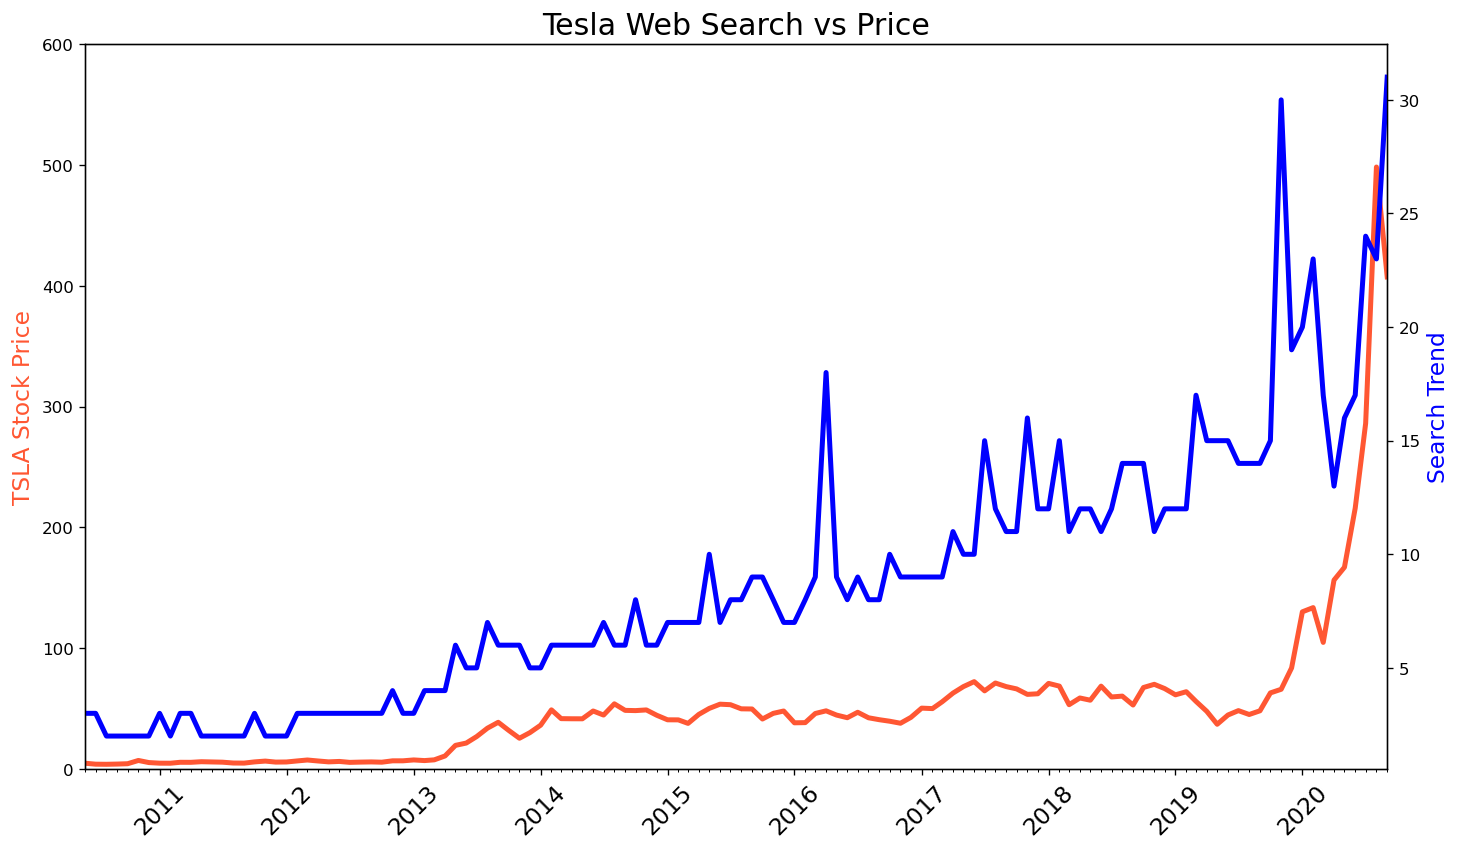

In [159]:
# Creating locators for ticks on the time axis
years = mdates.YearLocator()
months = mdates.MonthLocator()
years_fmt = mdates.DateFormatter("%Y")


# increase size and resolution
plt.figure(figsize=(14,8), dpi=120) 
# Add title
plt.title('Tesla Web Search vs Price', fontsize=18)

# Increase the size and rotate the labels on the x-axis
plt.xticks(fontsize=14, rotation=45)

# Get current axis
ax1 = plt.gca()
# Make copy of axis
ax2 = ax1.twinx()

# Increase Font Size
ax1.set_ylabel('TSLA Stock Price', color='#FF5733', fontsize=14)
ax2.set_ylabel('Search Trend', color='blue', fontsize=14)

# Set the minimum and maximum values on the axes
ax1.set_ylim([0, 600])
ax1.set_xlim([df_tesla.MONTH.min(), df_tesla.MONTH.max()])

# Ploting Tesla stock price against the Tesla search volume
# Increase line width
ax1.plot(df_tesla.MONTH, df_tesla.TSLA_USD_CLOSE, color='#FF5733', linewidth=3)
ax2.plot(df_tesla.MONTH, df_tesla.TSLA_WEB_SEARCH, color='blue', linewidth=3)

# format the ticks
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)  

# show() displays the chart below the cell
plt.show()



### Bitcoin (BTC) Price v.s. Search Volume

**Challenge**: Create the same chart for the Bitcoin Prices vs. Search volumes. <br>
1. Modify the chart title to read 'Bitcoin News Search vs Resampled Price' <br>
2. Change the y-axis label to 'BTC Price' <br>
3. Change the y- and x-axis limits to improve the appearance <br>
4. Investigate the [linestyles](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html ) to make the BTC price a dashed line <br>
5. Investigate the [marker types](https://matplotlib.org/3.2.1/api/markers_api.html) to make the search datapoints little circles <br>
6. Were big increases in searches for Bitcoin accompanied by big increases in the price?

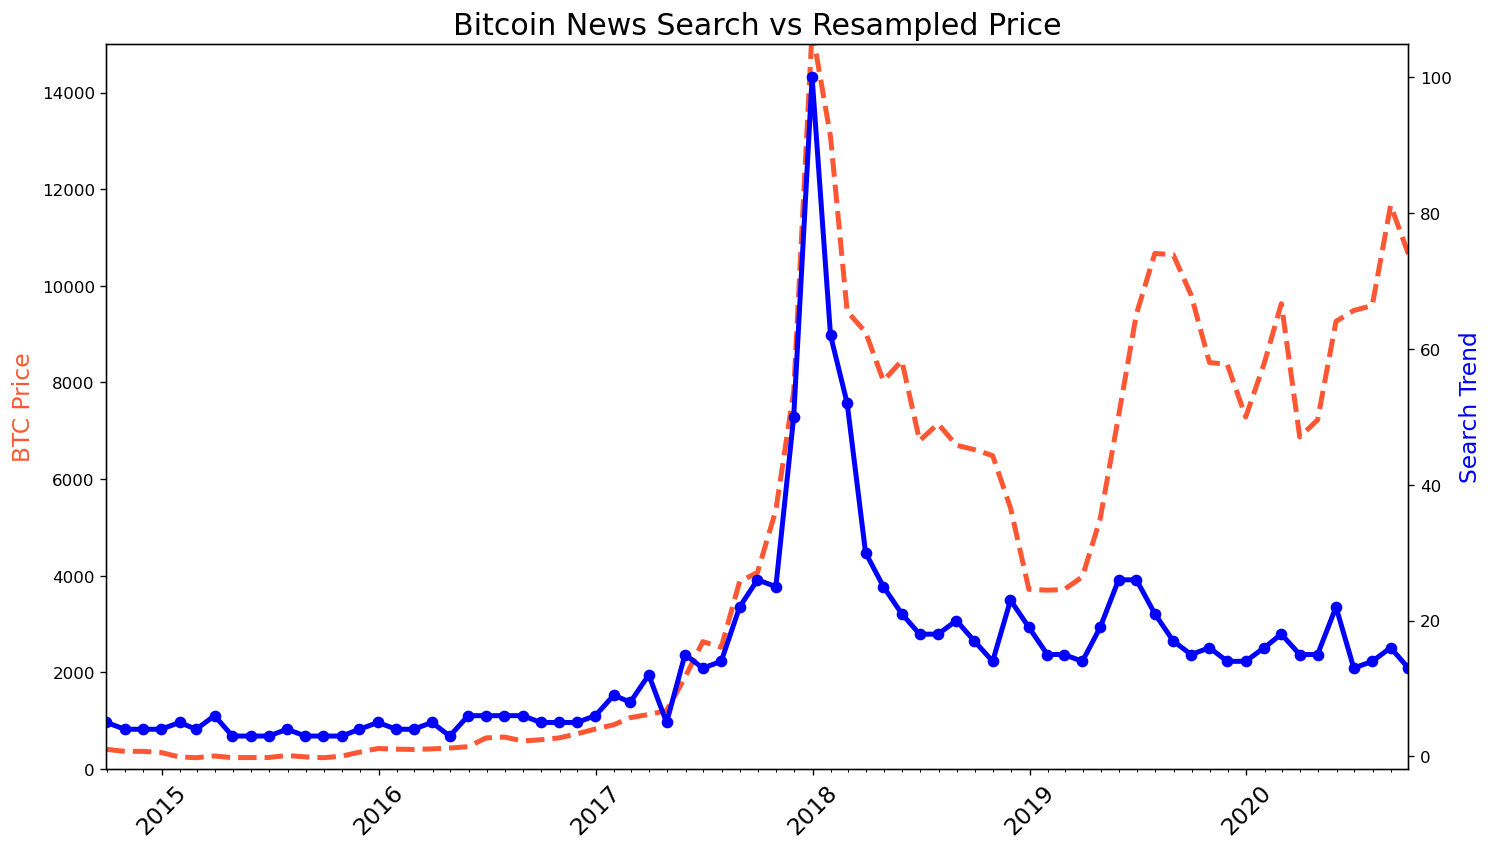

In [162]:
# Creating locators for ticks on the time axis
years = mdates.YearLocator()
months = mdates.MonthLocator()
years_fmt = mdates.DateFormatter("%Y")


# increase size and resolution
plt.figure(figsize=(14,8), dpi=120)

# Add title
plt.title('Bitcoin News Search vs Resampled Price', fontsize=18)

# Increase the size and rotate the labels on the x-axis
plt.xticks(fontsize=14, rotation=45)

# Get current axis
ax1 = plt.gca()
# Make copy of axis
ax2 = ax1.twinx()

# Increase Font Size
ax1.set_ylabel('BTC Price', color='#FF5733', fontsize=14)
ax2.set_ylabel('Search Trend', color='blue', fontsize=14)

# Set the minimum and maximum values on the axes
ax1.set_ylim([0, 15000])
ax1.set_xlim([df_btc_monthly.index.min(), df_btc_monthly.index.max()])

# Ploting BTC stock price against the Search Trend
# Increase line width and changed line style
ax1.plot(df_btc_monthly.index, df_btc_monthly.CLOSE, color='#FF5733', linewidth=3, linestyle='--')
ax2.plot(df_btc_monthly.index, df_btc_search.BTC_NEWS_SEARCH, color='blue', linewidth=3, marker='o')

# format the ticks
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)  

# show() displays the chart below the cell
plt.show()

### Unemployement Benefits Search vs. Actual Unemployment in the U.S.

**Challenge** Plot the search for "unemployment benefits" against the unemployment rate. 
1. Change the title to: Monthly Search of "Unemployment Benefits" in the U.S. vs the U/E Rate <br>
2. Change the y-axis label to: FRED U/E Rate <br>
3. Change the axis limits <br>
4. Add a grey [grid](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.grid.html) to the chart to better see the years and the U/E rate values. Use dashes for the line style<br> 
5. Can you discern any seasonality in the searches? Is there a pattern? 

In [163]:
df_unemployment.head()

,MONTH,UE_BENEFITS_WEB_SEARCH,UNRATE
0,2004-01-01,34,5.7
1,2004-02-01,33,5.6
2,2004-03-01,25,5.8
3,2004-04-01,29,5.6
4,2004-05-01,23,5.6


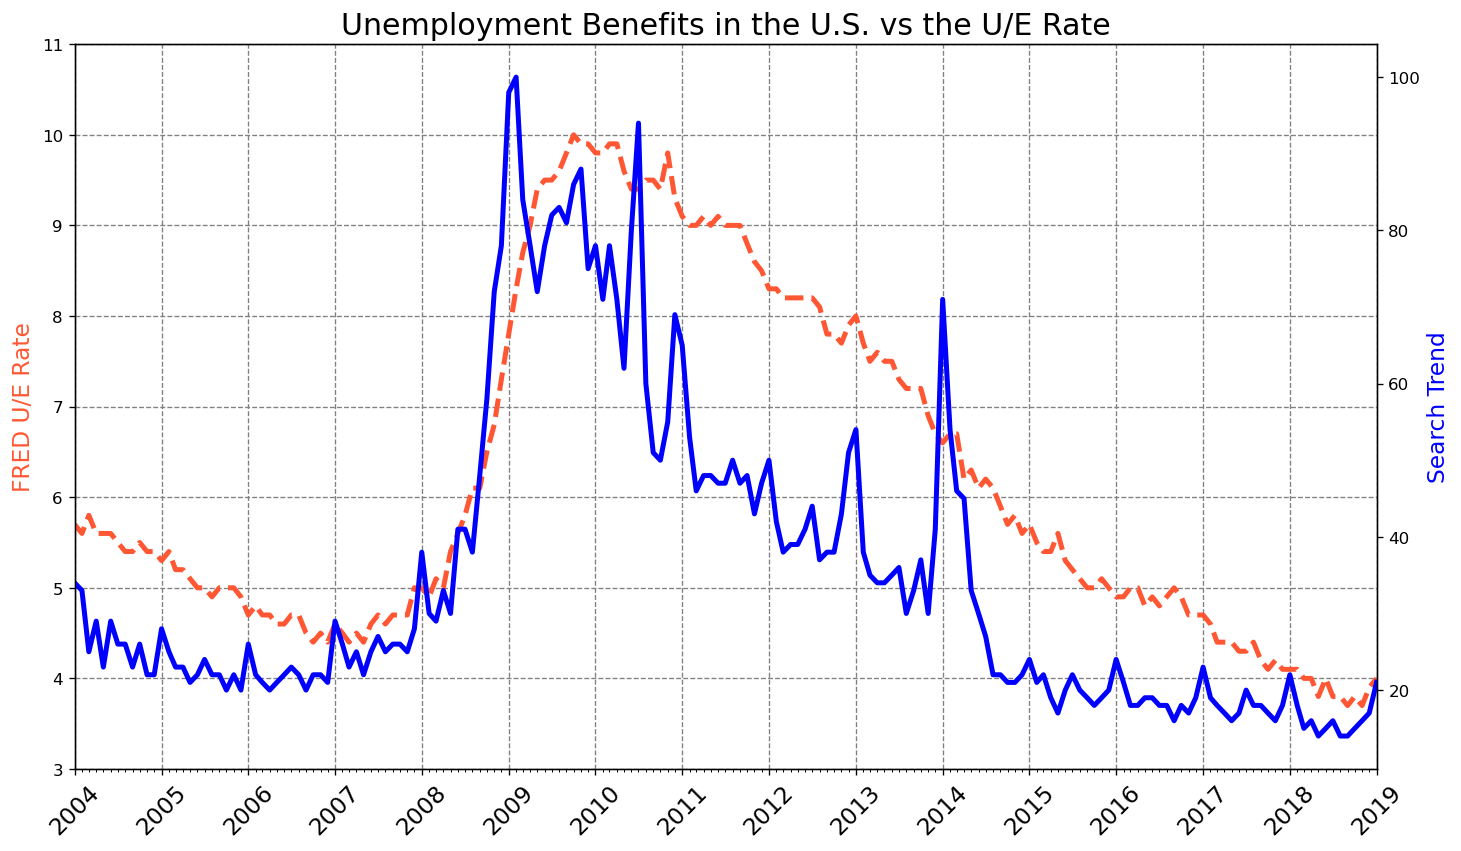

In [176]:
# Creating locators for ticks on the time axis
years = mdates.YearLocator()
months = mdates.MonthLocator()
years_fmt = mdates.DateFormatter("%Y")


# increase size and resolution
plt.figure(figsize=(14,8), dpi=120)

# Add title
plt.title('Unemployment Benefits in the U.S. vs the U/E Rate', fontsize=18)

# Increase the size and rotate the labels on the x-axis
plt.xticks(fontsize=14, rotation=45)

# Get current axis
ax1 = plt.gca()
# Make copy of axis
ax2 = ax1.twinx()

# Increase Font Size
ax1.set_ylabel('FRED U/E Rate', color='#FF5733', fontsize=14)
ax2.set_ylabel('Search Trend', color='blue', fontsize=14)

# Set the minimum and maximum values on the axes
ax1.set_ylim([3, 11])
ax1.set_xlim([df_unemployment.MONTH.min(), df_unemployment.MONTH.max()])

# Grey grid lines
ax1.grid(color='grey', linestyle='--')

# unemployment benefits search against the official unemployment rate
ax1.plot(df_unemployment.MONTH, df_unemployment.UNRATE, color='#FF5733', linewidth=3, linestyle='--')
ax2.plot(df_unemployment.MONTH, df_unemployment.UE_BENEFITS_WEB_SEARCH, color='blue', linewidth=3)

# format the ticks
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)  

# show() displays the chart below the cell
plt.show()

In [ ]:
# There was a big spike in unemployment in 2007-2008 and a big spike in unemployment benefits search

**Challenge**: Calculate the 3-month or 6-month rolling average for the web searches. Plot the 6-month rolling average search data against the actual unemployment. What do you see in the chart? Which line moves first?


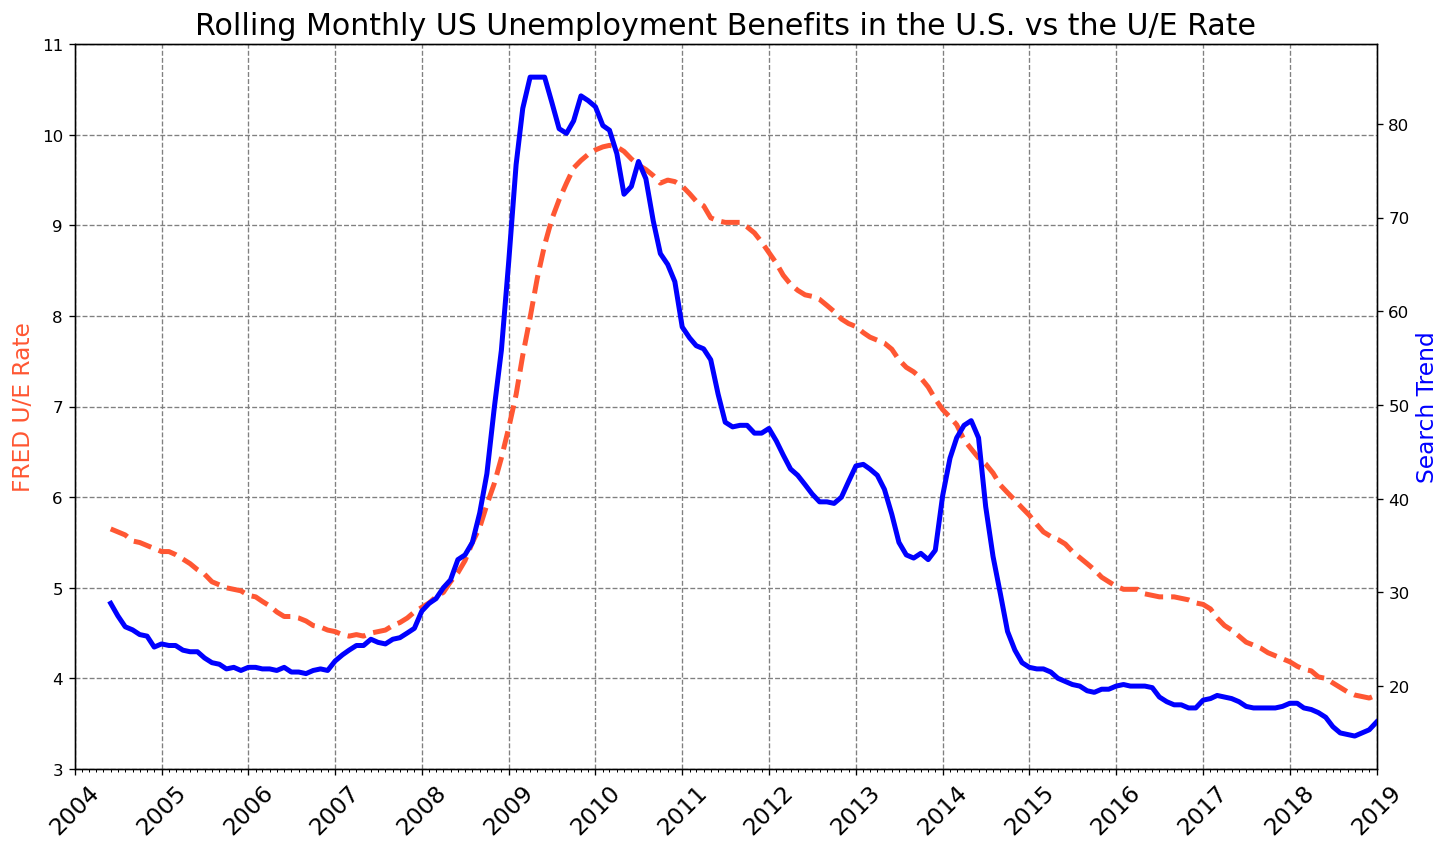

In [184]:
# Calculating 6-month rolling average
rolling_df = df_unemployment[['UE_BENEFITS_WEB_SEARCH', 'UNRATE']].rolling(window=6).mean()

# Creating locators for ticks on the time axis
years = mdates.YearLocator()
months = mdates.MonthLocator()
years_fmt = mdates.DateFormatter("%Y")


# increase size and resolution
plt.figure(figsize=(14,8), dpi=120)

# Add title
plt.title('Rolling Monthly US Unemployment Benefits in the U.S. vs the U/E Rate', fontsize=18)

# Increase the size and rotate the labels on the x-axis
plt.xticks(fontsize=14, rotation=45)

# Get current axis
ax1 = plt.gca()
# Make copy of axis
ax2 = ax1.twinx()

# Increase Font Size
ax1.set_ylabel('FRED U/E Rate', color='#FF5733', fontsize=14)
ax2.set_ylabel('Search Trend', color='blue', fontsize=14)

# Set the minimum and maximum values on the axes
ax1.set_ylim([3, 11])
ax1.set_xlim([df_unemployment.MONTH.min(), df_unemployment.MONTH.max()])

# Grey grid lines
ax1.grid(color='grey', linestyle='--')

# rolling average of unemployment benefits search and the official unemployment rate
ax1.plot(df_unemployment.MONTH, rolling_df.UNRATE, color='#FF5733', linewidth=3, linestyle='--')
ax2.plot(df_unemployment.MONTH, rolling_df.UE_BENEFITS_WEB_SEARCH, color='blue', linewidth=3)

# format the ticks
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months) 


# show() displays the chart below the cell
plt.show()



In [ ]:
# The line graph indicates that unemployment search seems to go up and then down prior to the unemployment rate rising and falling.

### Including 2020 in Unemployment Charts

**Challenge**: Read the data in the 'UE Benefits Search vs UE Rate 2004-20.csv' into a DataFrame. Convert the MONTH column to Pandas Datetime objects and then plot the chart. What do you see?

In [199]:
# Reading data into a data frame
df_ue_benefits = pd.read_csv('UE Benefits Search vs UE Rate 2004-20.csv')
df_ue_benefits.head()

,MONTH,UE_BENEFITS_WEB_SEARCH,UNRATE
0,2004-01,9,5.7
1,2004-02,8,5.6
2,2004-03,7,5.8
3,2004-04,8,5.6
4,2004-05,6,5.6


In [200]:
# Converting the MONTH column to Pandas Datetime objects
df_ue_benefits.MONTH = pd.to_datetime(df_ue_benefits.MONTH)
df_ue_benefits.MONTH.head()

0   2004-01-01
1   2004-02-01
2   2004-03-01
3   2004-04-01
4   2004-05-01
Name: MONTH, dtype: datetime64[ns]

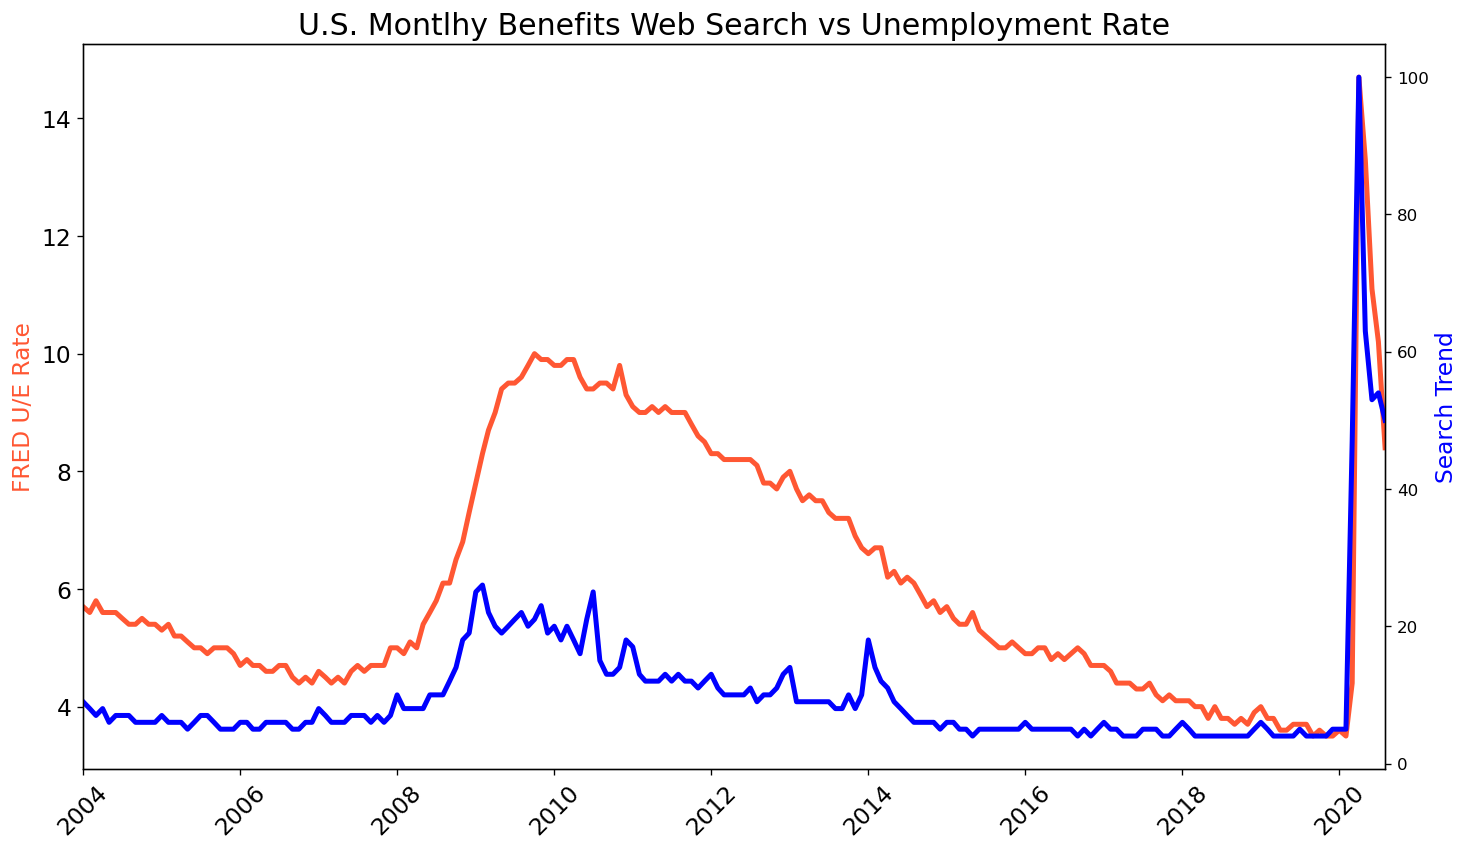

In [202]:
# increase size and resolution
plt.figure(figsize=(14,8), dpi=120)

# Add title
plt.title('U.S. Montlhy Benefits Web Search vs Unemployment Rate', fontsize=18)

# Increase the size and rotate the labels on the x-axis
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)

# Get current axis
ax1 = plt.gca()
# Make copy of axis
ax2 = ax1.twinx()

# Increase Font Size
ax1.set_ylabel('FRED U/E Rate', color='#FF5733', fontsize=14)
ax2.set_ylabel('Search Trend', color='blue', fontsize=14)

# Set the minimum and maximum values on X-axis
ax1.set_xlim([df_ue_benefits.MONTH.min(), df_ue_benefits.MONTH.max()])

# rolling average of unemployment benefits search and the official unemployment rate
ax1.plot(df_ue_benefits.MONTH, df_ue_benefits.UNRATE, color='#FF5733', linewidth=3)
ax2.plot(df_ue_benefits.MONTH, df_ue_benefits.UE_BENEFITS_WEB_SEARCH, color='blue', linewidth=3)

# # format the ticks
# ax1.xaxis.set_major_locator(years)
# ax1.xaxis.set_major_formatter(years_fmt)
# ax1.xaxis.set_minor_locator(months) 


# show() displays the chart below the cell
plt.show()
